# EasyOCR Handwritten Text Recognition

Notebook นี้เตรียมไว้สำหรับใช้ EasyOCR กับ dataset ที่มีรูปภาพ (train / test) อยู่แล้ว
- ใช้โมเดล pretrained ของ EasyOCR (ไม่ต้องเทรนเอง)
- สามารถปรับ path ของโฟลเดอร์ train / test ให้ตรงกับ dataset ของคุณได้
- มีฟังก์ชันสำหรับรันทั้งโฟลเดอร์และบันทึกผลเป็น CSV

In [ ]:
!pip install easyocr
!pip install matplotlib opencv-python pillow pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 19.3 MB/s eta 0:00:00


In [ ]:
import os
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

## ตั้งค่า path ของ dataset

- ถ้าใช้ Google Drive: ให้ mount drive แล้วเปลี่ยน `DATASET_ROOT`
- สมมติว่าโครงสร้างประมาณนี้:
  - `dataset/train/` → รูปภาพสำหรับ train
  - `dataset/test/` → รูปภาพสำหรับ test

คุณสามารถแก้ path ให้ตรงกับของตัวเองได้เลย

### Mount Google Drive ถ้า dataset อยู่ใน Drive

link google drive : [B1B2](https://drive.google.com/drive/folders/15MZ1fTS3ChKncwmZwmVdGz7v2guUR3Wk?usp=drive_link)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_ROOT = Path('/content/drive/MyDrive/handwriting/input/gnhk_dataset')  # เปลี่ยนให้ตรงกับตำแหน่งจริง (เช่น '/content/drive/MyDrive/HTR_dataset')
TRAIN_DIR = DATASET_ROOT / 'train_data/train'
TEST_DIR = DATASET_ROOT / 'test_data/test'

print('Train dir:', TRAIN_DIR)
print('Test dir :', TEST_DIR)

Train dir: /content/drive/MyDrive/handwriting/input/gnhk_dataset/train_data/train
Test dir : /content/drive/MyDrive/handwriting/input/gnhk_dataset/test_data/test


## สร้าง EasyOCR Reader และฟังก์ชัน OCR
- `ocr_to_text` → อ่านรูปเดี่ยว คืนผลเป็นข้อความ (ทีละบรรทัด)
- `ocr_paragraph` → รวมทุกบรรทัดเป็นข้อความยาวบรรทัดเดียว
- สามารถตั้งภาษาได้ เช่น `['th', 'en']`

In [ ]:
# เลือกภาษา (แก้ได้ตามที่ใช้จริง)
LANGUAGES = ['en']  # ถ้าไม่มีไทยก็ใช้ ['en'] อย่างเดียวได้

# โมเดลถูกโหลดอัตโนมัติ
reader = easyocr.Reader(LANGUAGES)

def ocr_to_text(image_path, reader=reader):
    """อ่านข้อความจากรูปภาพและคืนผลเป็น string หลายบรรทัด"""
    results = reader.readtext(str(image_path), detail=0)
    text = "\n".join(results)
    return text

def ocr_paragraph(image_path, reader=reader):
    """อ่านข้อความจากรูปภาพและคืนผลเป็นข้อความบรรทัดเดียว"""
    results = reader.readtext(str(image_path), detail=0)
    return " ".join(results)

### ตรวจสอบข้องในโฟลเดอร์ของโมเดล EasyOCR

In [ ]:
!ls -R /root/.EasyOCR

/root/.EasyOCR:
model  user_network

/root/.EasyOCR/model:
craft_mlt_25k.pth  english_g2.pth

/root/.EasyOCR/user_network:


## ทดลองกับรูปภาพ 1 รูป (จากโฟลเดอร์ train หรือ test)
คุณสามารถเปลี่ยนชื่อไฟล์หรือ path ตามต้องการ

ใช้ภาพตัวอย่าง: /content/drive/MyDrive/handwriting/input/gnhk_dataset/train_data/train/eng_EU_287.jpg


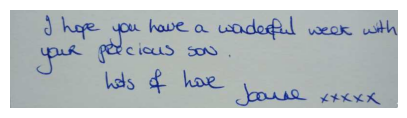

🔍 OCR result:
J
habe &
uodeaAl
ueok
Lsdh
6 icu5
S
Jk
kls &
hae
~aao
XYXyx
hqe
<


In [ ]:
sample_dir = TRAIN_DIR  # หรือ TEST_DIR
image_files = [p for p in sample_dir.glob('*') if p.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']]

if len(image_files) == 0:
    print('ไม่พบไฟล์รูปภาพใน:', sample_dir)
else:
    sample_image = image_files[0]
    print('ใช้ภาพตัวอย่าง:', sample_image)

    # แสดงภาพ
    img = cv2.imread(str(sample_image))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5,5))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    # แสดงผล OCR
    text = ocr_to_text(sample_image)
    print('🔍 OCR result:')
    print(text)

ใช้ภาพตัวอย่าง: /content/drive/MyDrive/handwriting/input/gnhk_dataset/test_data/test/eng_EU_131.jpg


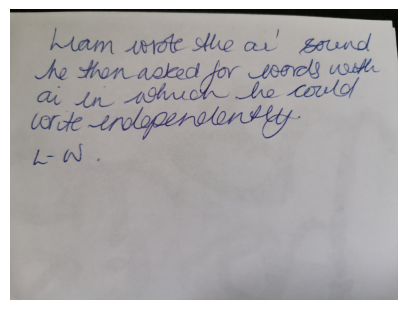

🔍 OCR result:
klam Aole slle &j'
Zound
h sn aoked
~eexel utll
a
In
3beoule
(oike
nlpehalonsett
L- (
rgied/or


In [ ]:
# เลือกไฟล์ภาพตัวอย่างจากโฟลเดอร์ train หรือ test
sample_dir = TEST_DIR  # หรือ TEST_DIR
image_files = [p for p in sample_dir.glob('*') if p.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']]

if len(image_files) == 0:
    print('ไม่พบไฟล์รูปภาพใน:', sample_dir)
else:
    sample_image = image_files[0]
    print('ใช้ภาพตัวอย่าง:', sample_image)

    # แสดงภาพ
    img = cv2.imread(str(sample_image))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5,5))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    # แสดงผล OCR
    text = ocr_to_text(sample_image)
    print('🔍 OCR result:')
    print(text)

สุ่มภาพตัวอย่าง: /content/drive/MyDrive/handwriting/input/gnhk_dataset/test_data/test/eng_EU_160.jpg


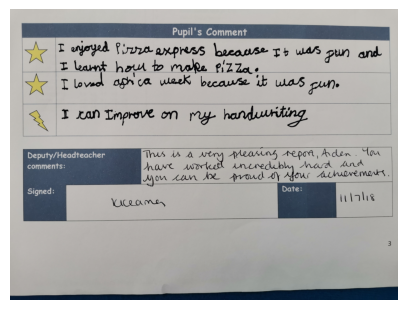

🔍 OCR result:
Pupil' $ Comment
I
enieyed { Uzd AxPress beeallse T$ Was
I labnt
heul w
mabe
2xz
I
ah ca
uleeK
because 't
ulas
I
san Improvee
o
my
handulriting
Deputy/Headteacher
Ths
iA
A
Measinh Nepon , Aclen
comments:
hawe
xexita?
nud
Lna
Xo
kun
R
Avou 2
Auhuvemakk _
Signed:
Date:
MMnl&
UCQamc)
3
and
Fen)
Zd"
loved
fun
Taa
Mucsddhlcw


In [ ]:
# สุ่มรูปภาพเพื่อตรวจสอบผลลัพธ์
import random

sample_dir = TEST_DIR
image_files = [p for p in sample_dir.glob('*') if p.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']]

if len(image_files) == 0:
    print('ไม่พบไฟล์รูปภาพใน:', sample_dir)
else:
    sample_image = random.choice(image_files)   # 👈 สุ่ม 1 รูป
    print('สุ่มภาพตัวอย่าง:', sample_image)

    # แสดงภาพ
    img = cv2.imread(str(sample_image))
    if img is None:
        print(f"⚠️ ไม่สามารถโหลดภาพเพื่อแสดงผลได้: {sample_image}. อาจเป็นไฟล์เสียหรือไม่มีอยู่จริง.")
        print("จะข้ามการแสดงภาพและการทำ OCR สำหรับไฟล์นี้.")
    else:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(5,5))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()

        # แสดงผล OCR
        try:
            text = ocr_to_text(sample_image)
            print('🔍 OCR result:')
            print(text)
        except Exception as e:
            print(f"❌ เกิดข้อผิดพลาดในการทำ OCR กับภาพ {sample_image}: {e}")
            print("โปรดตรวจสอบไฟล์ภาพว่าเสียหายหรือไม่")

ใช้ภาพตัวอย่าง: /content/drive/MyDrive/handwriting/input/gnhk_dataset/test_processed/images/eng_EU_210_3.jpg


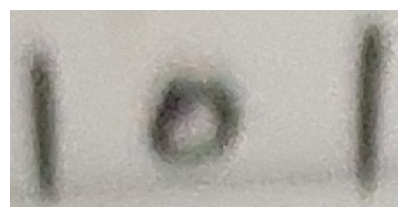

🔍 OCR result:



In [ ]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# ระบุพาธไฟล์ภาพที่ต้องการทดสอบโดยตรง
sample_image = Path("/content/drive/MyDrive/handwriting/input/gnhk_dataset/test_processed/images/eng_EU_210_3.jpg")

if not sample_image.exists():
    print("ไม่พบไฟล์รูปภาพที่ระบุ:", sample_image)
else:
    print("ใช้ภาพตัวอย่าง:", sample_image)

    # แสดงภาพ
    img = cv2.imread(str(sample_image))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5, 5))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

    # แสดงผล OCR
    text = ocr_to_text(sample_image)  # ถ้า function รับ path/str ก็ใช้ str(sample_image) ได้
    print("🔍 OCR result:")
    print(text)

ใช้ภาพตัวอย่าง: /content/drive/MyDrive/handwriting/input/gnhk_dataset/test_processed/images/eng_EU_210_5.jpg


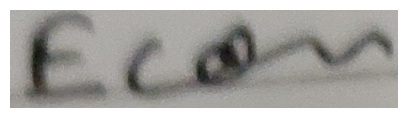

🔍 OCR result:
Ec


In [ ]:
# ระบุพาธไฟล์ภาพที่ต้องการทดสอบโดยตรง
sample_image = Path("/content/drive/MyDrive/handwriting/input/gnhk_dataset/test_processed/images/eng_EU_210_5.jpg")

if not sample_image.exists():
    print("ไม่พบไฟล์รูปภาพที่ระบุ:", sample_image)
else:
    print("ใช้ภาพตัวอย่าง:", sample_image)

    # แสดงภาพ
    img = cv2.imread(str(sample_image))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5, 5))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

    # แสดงผล OCR
    text = ocr_to_text(sample_image)  # ถ้า function รับ path/str ก็ใช้ str(sample_image) ได้
    print("🔍 OCR result:")
    print(text)

ใช้ภาพตัวอย่าง: /content/drive/MyDrive/handwriting/input/gnhk_dataset/test_processed/images/eng_EU_210_6.jpg


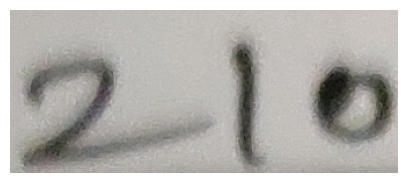

🔍 OCR result:
2


In [ ]:
# ระบุพาธไฟล์ภาพที่ต้องการทดสอบโดยตรง
sample_image = Path("/content/drive/MyDrive/handwriting/input/gnhk_dataset/test_processed/images/eng_EU_210_6.jpg")

if not sample_image.exists():
    print("ไม่พบไฟล์รูปภาพที่ระบุ:", sample_image)
else:
    print("ใช้ภาพตัวอย่าง:", sample_image)

    # แสดงภาพ
    img = cv2.imread(str(sample_image))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5, 5))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

    # แสดงผล OCR
    text = ocr_to_text(sample_image)  # ถ้า function รับ path/str ก็ใช้ str(sample_image) ได้
    print("🔍 OCR result:")
    print(text)

## (ตัวเลือก) รวมผล OCR กับ label จริง เพื่อคำนวณ metric
ถ้าคุณมีไฟล์ CSV ที่เก็บ ground truth เช่น:
- `train_labels.csv` ที่มีคอลัมน์ `image_path`, `gt_text`


In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 49.2 MB/s eta 0:00:00


In [ ]:
labels_df = pd.read_csv(DATASET_ROOT / 'train_processed.csv')

In [ ]:
from jiwer import wer, cer
from difflib import SequenceMatcher
# -----------------------
# 1) Character Error Rate
# -----------------------
def compute_cer(gt, pred):
    return cer(gt, pred)

# -----------------------
# 2) Word Error Rate
# -----------------------
def compute_wer(gt, pred):
    return wer(gt, pred)

# -----------------------
# 3) Accuracy แบบตัวอักษร
# -----------------------
def char_accuracy(gt, pred):
    matcher = SequenceMatcher(None, gt, pred)
    ratio = matcher.ratio()   # อัตราการ match
    return ratio * 100        # เป็น %

In [ ]:
def run_ocr_on_folder(folder_path, reader, output_csv=None, limit=None):
    import pandas as pd
    from pathlib import Path
    import random

    image_files = [p for p in Path(folder_path).glob('*')
                   if p.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']]

    if limit and len(image_files) > limit:
        image_files = random.sample(image_files, limit)
        print(f"สุ่มเลือกรูปภาพ {limit} รูปจากทั้งหมด {len(image_files)} รูปใน {folder_path}")
    else:
        print(f"พบรูปภาพทั้งหมด {len(image_files)} รูปใน {folder_path}")

    records = []
    for img_path in image_files:
        try:
            text = reader.readtext(str(img_path), detail=0)
            text = "\n".join(text)
        except Exception as e:
            print(f"Error ที่ไฟล์ {img_path}: {e}")
            text = ""

        records.append({
            "image_path": str(img_path),
            "ocr_text": text
        })

    df = pd.DataFrame(records)

    if output_csv:
        df.to_csv(output_csv, index=False)
        print("บันทึกผล:", output_csv)

    return df


In [ ]:
def run_ocr_on_folder(folder_path, reader, output_csv=None, limit=None):
    import pandas as pd
    from pathlib import Path
    import cv2, random

    image_files = [p for p in Path(folder_path).glob('*')
                   if p.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']]

    if limit is not None:
        image_files = random.sample(image_files, min(limit, len(image_files)))

    print(f"สุ่มเลือกรูปภาพ {len(image_files)} รูปจากทั้งหมด {len(image_files)} รูปใน {folder_path}")

    records = []

    for img_path in image_files:
        try:
            # 1) อ่านรูป
            img = cv2.imread(str(img_path))
            if img is None:
                print("⚠️ อ่านรูปไม่ได้ (img is None):", img_path)
                continue

            # 2) ลดขนาดรูป ถ้าใหญ่เกิน (เช่น ด้านยาวไม่เกิน 1600 px)
            max_dim = 1600
            h, w = img.shape[:2]
            scale = max_dim / max(h, w)
            if scale < 1.0:
                new_w, new_h = int(w * scale), int(h * scale)
                img = cv2.resize(img, (new_w, new_h))

            # 3) ส่ง 'img' (numpy array) เข้า EasyOCR แทน path
            text_list = reader.readtext(img, detail=0)
            text = "\n".join(text_list)

        except Exception as e:
            print(f"Error ที่ไฟล์ {img_path}: {e}")
            text = ""

        records.append({
            "image_path": str(img_path),
            "ocr_text": text
        })

    df = pd.DataFrame(records)

    if output_csv:
        df.to_csv(output_csv, index=False)
        print("บันทึกผล:", output_csv)

    return df


In [ ]:
from pathlib import Path
import cv2

p = Path("/content/drive/MyDrive/handwriting/input/gnhk_dataset/train_data/train/eng_NA_134.jpg")
print("exists:", p.exists())

img = cv2.imread(str(p))
print("img is None? ->", img is None)
if img is not None:
    print("shape:", img.shape)


exists: True
img is None? -> False
shape: (4608, 3456, 3)


In [ ]:
test_results = run_ocr_on_folder(
    TEST_DIR,
    reader,
    DATASET_ROOT / 'ocr_test_results.csv',
    limit=50
)

สุ่มเลือกรูปภาพ 50 รูปจากทั้งหมด 50 รูปใน /content/drive/MyDrive/handwriting/input/gnhk_dataset/train_data/train
บันทึกผล: /content/drive/MyDrive/handwriting/input/gnhk_dataset/ocr_train_results.csv
สุ่มเลือกรูปภาพ 50 รูปจากทั้งหมด 50 รูปใน /content/drive/MyDrive/handwriting/input/gnhk_dataset/test_data/test
บันทึกผล: /content/drive/MyDrive/handwriting/input/gnhk_dataset/ocr_test_results.csv


In [ ]:
import torch
import numpy as np
from tqdm.notebook import tqdm
from dataclasses import dataclass

@dataclass
class PredictionOutput:
    predictions: np.ndarray
    label_ids: np.ndarray

def evaluate_model_cer(model, processor, dataset, device):
    model.eval()  # Set model to evaluation mode
    all_true_labels_ids = []
    all_generated_ids = []

    with torch.no_grad():  # Disable gradient calculation for inference
        for i in tqdm(range(len(dataset)), desc="Evaluating"): # Iterate through individual items
            batch = dataset[i]
            pixel_values = batch["pixel_values"].unsqueeze(0).to(device)  # Add batch dimension (batch_size=1)
            labels = batch["labels"]  # These are already token IDs, typically padded with -100

            generated_ids = model.generate(pixel_values)  # Shape: (1, generated_seq_len)

            all_generated_ids.append(generated_ids.cpu().numpy()) # Store as numpy array
            all_true_labels_ids.append(labels.cpu().numpy()) # Store as numpy array

    # Pad generated IDs to the maximum length found across all predictions
    # This is necessary because model.generate can produce variable-length sequences
    max_gen_len = max(arr.shape[1] for arr in all_generated_ids)
    padded_generated_ids = []
    for gen_id_arr in all_generated_ids:
        pad_width = max_gen_len - gen_id_arr.shape[1]
        # Pad with the tokenizer's pad_token_id
        padded_arr = np.pad(gen_id_arr, ((0, 0), (0, pad_width)), mode='constant', constant_values=processor.tokenizer.pad_token_id)
        padded_generated_ids.append(padded_arr)
    final_generated_ids = np.vstack(padded_generated_ids) # Stack all padded predictions into a single array

    # True labels should already be consistently padded to max_target_length with -100 by CustomOCRDataset
    final_true_labels_ids = np.stack(all_true_labels_ids) # Stack all true labels into a single array

    # Create a dummy PredictionOutput object to match the compute_cer function's expected input
    pred_output = PredictionOutput(predictions=final_generated_ids, label_ids=final_true_labels_ids)

    # Compute CER using the provided function
    cer_result = compute_cer(pred_output)

    return cer_result["cer"]

print("Evaluation helper function `evaluate_model_cer` defined successfully.")

Evaluation helper function `evaluate_model_cer` defined successfully.


In [ ]:
import numpy as np
from pathlib import Path
import pandas as pd

# ===== 1) ชี้โฟลเดอร์รูปให้ถูก =====
TRAIN_DIR = Path("/content/drive/MyDrive/handwriting/input/gnhk_dataset/train_processed/images")
print("TRAIN_DIR:", TRAIN_DIR)

# ลองเช็กรูปในโฟลเดอร์นี้ก่อน
!ls -l "/content/drive/MyDrive/handwriting/input/gnhk_dataset/train_processed/images" | head


TRAIN_DIR: /content/drive/MyDrive/handwriting/input/gnhk_dataset/train_processed/images
total 144835
-rw------- 1 root root  12713 Nov 10 10:36 eng_AF_001_0.jpg
-rw------- 1 root root  31638 Nov 10 10:36 eng_AF_001_10.jpg
-rw------- 1 root root  13973 Nov 10 10:36 eng_AF_001_13.jpg
-rw------- 1 root root  27282 Nov 10 10:36 eng_AF_001_14.jpg
-rw------- 1 root root  23220 Nov 10 10:36 eng_AF_001_16.jpg
-rw------- 1 root root  25412 Nov 10 10:36 eng_AF_001_1.jpg
-rw------- 1 root root  41459 Nov 10 10:36 eng_AF_001_2.jpg
-rw------- 1 root root  19540 Nov 10 10:36 eng_AF_001_4.jpg
-rw------- 1 root root  20187 Nov 10 10:36 eng_AF_001_8.jpg


In [ ]:
# ===== 2) รัน EasyOCR กับรูปใน train_processed/images (สุ่ม 50 รูป) =====
train_results = run_ocr_on_folder(
    TRAIN_DIR,
    reader,
    "/content/drive/MyDrive/handwriting/input/gnhk_dataset/ocr_train_results.csv",
    limit=50
)

print("train_results shape:", train_results.shape)
print(train_results.head())


สุ่มเลือกรูปภาพ 50 รูปจากทั้งหมด 50 รูปใน /content/drive/MyDrive/handwriting/input/gnhk_dataset/train_processed/images
บันทึกผล: /content/drive/MyDrive/handwriting/input/gnhk_dataset/ocr_train_results.csv
train_results shape: (50, 2)
                                          image_path ocr_text
0  /content/drive/MyDrive/handwriting/input/gnhk_...     We )
1  /content/drive/MyDrive/handwriting/input/gnhk_...       Lo
2  /content/drive/MyDrive/handwriting/input/gnhk_...         
3  /content/drive/MyDrive/handwriting/input/gnhk_...      the
4  /content/drive/MyDrive/handwriting/input/gnhk_...       cr


In [ ]:
import numpy as np
from pathlib import Path

def evaluate_ocr(df):
    cer_list = []
    wer_list = []
    acc_list = []

    for _, row in df.iterrows():
        gt = str(row["gt_text"])
        pred = str(row["ocr_text"])

        cer_list.append(compute_cer(gt, pred))
        wer_list.append(compute_wer(gt, pred))
        acc_list.append(char_accuracy(gt, pred))

    results = {
        "CER_avg": np.mean(cer_list),
        "WER_avg": np.mean(wer_list),
        "Accuracy_avg": np.mean(acc_list)
    }
    return results

# 3) ถ้า train_results ยังว่างอยู่ ให้หยุดก่อน
if train_results.empty:
    print("⚠️ train_results ว่าง (ไม่มีรูปเลย) ให้เช็ก TRAIN_DIR อีกครั้งว่ามีไฟล์รูปอยู่จริง")
else:
    # 4) อ่าน labels จาก train_processed.csv
    labels_df = pd.read_csv(
        "/content/drive/MyDrive/handwriting/input/gnhk_dataset/train_processed.csv"
    )

    labels_df_renamed = labels_df.rename(
        columns={
            "image_filename": "image_filename",
            "text": "gt_text"
        }
    )

    # ทำชื่อไฟล์ให้สะอาด
    labels_df_renamed["image_filename"] = (
        labels_df_renamed["image_filename"]
        .astype(str)
        .str.strip()
        .str.lower()
    )

    # 5) เพิ่ม image_filename ใน train_results
    train_results["image_filename"] = (
        train_results["image_path"]
        .apply(lambda p: Path(p).name)
        .astype(str)
        .str.strip()
        .str.lower()
    )

    print("📌 ตัวอย่างจาก train_results:")
    print(train_results[["image_path", "image_filename"]].head())

    print("\n📌 ตัวอย่างจาก labels_df_renamed:")
    print(labels_df_renamed[["image_filename", "gt_text"]].head())

    # 6) merge
    merged = pd.merge(
        train_results,
        labels_df_renamed,
        on="image_filename",
        how="inner"
    )

    print("\nจำนวนแถวหลัง merge:", len(merged))

    # 7) evaluate
    if not merged.empty:
        results = evaluate_ocr(merged)
        print(
            f"{{'CER_avg': {results['CER_avg']:.4f}, "
            f"'WER_avg': {results['WER_avg']:.4f}, "
            f"'Accuracy_avg': {results['Accuracy_avg']:.4f}}}"
        )
    else:
        print("⚠️ ไม่พบข้อมูลที่ตรงกันหลังการรวมไฟล์ (merged dataframe is empty).")
        print("โปรดตรวจสอบว่า 'image_filename' ใน train_results และใน train_processed.csv ตรงกัน")


📌 ตัวอย่างจาก train_results:
                                          image_path      image_filename
0  /content/drive/MyDrive/handwriting/input/gnhk_...   eng_na_068_37.jpg
1  /content/drive/MyDrive/handwriting/input/gnhk_...   eng_eu_318_86.jpg
2  /content/drive/MyDrive/handwriting/input/gnhk_...  eng_as_097_119.jpg
3  /content/drive/MyDrive/handwriting/input/gnhk_...  eng_eu_312_222.jpg
4  /content/drive/MyDrive/handwriting/input/gnhk_...   eng_eu_120_95.jpg

📌 ตัวอย่างจาก labels_df_renamed:
     image_filename     gt_text
0  eng_as_097_0.jpg       Date:
1  eng_as_097_1.jpg    01/31/18
2  eng_as_097_2.jpg      FORMAT
3  eng_as_097_3.jpg           -
4  eng_as_097_4.jpg  Full-block

จำนวนแถวหลัง merge: 50
{'CER_avg': 0.6985, 'WER_avg': 0.8800, 'Accuracy_avg': 34.4975}
